In [1]:
from utilities.evaluator import Evaluator
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm
from utilities.misc import dict_to_json
%load_ext autoreload
%autoreload 2

In [2]:
bond=1.5
problem_config={"problem" : "H4", "geometry": str([('H', (0., 0., 0.)), ('H', (0., 0., bond)), ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))]).replace("'",""), "multiplicity":1, "charge":0, "basis":"sto-3g"}
arguss= {"n_qubits":8,"problem_config":problem_config,"specific_name":"_rate_{}".format(1.0), "noise_config":{}}
evaluator = Evaluator(args=arguss,loading=True,path="../data-vans/",nrun_load=3)

In [3]:
from utilities.variational import VQE
from utilities.evaluator import Evaluator
from utilities.idinserter import IdInserter
from utilities.simplifier import Simplifier
from utilities.unitary_killer import UnitaryMurder

bond=1.5
problem_config ={"problem" : "H4", 
                               "geometry": [('H', (0., 0., 0.)), ('H', (0., 0., bond)), ('H', (0., 0., 2*bond)), ('H', (0., 0., 3*bond))], 
                               "multiplicity":1, "charge":0, "basis":"sto-3g"}
q=8
vqe_handler = VQE(n_qubits=q, lr=0.01, epochs=2000,
                    noise_config={}, problem_config=problem_config,
                    patience=200, random_perturbations=True, 
                  return_lower_bound=1, optimizer="adam")

iid = IdInserter(n_qubits=len(vqe_handler.qubits))
Simp = Simplifier(n_qubits=len(vqe_handler.qubits))
killer = UnitaryMurder(vqe_handler, noise_config={})


In [6]:
pcirc

┌───────────┐   ┌───────────┐                               ┌──┐   ┌──┐               ┌──┐                    ┌──────────┐       ┌──────────┐                 ┌────────────────────┐                ┌───────────┐   ┌───────────┐                    ┌──────────┐   ┌───────────┐   ┌───────────┐   ┌───────────┐
(0, 0): ────────────────────────────X───────@────Rz(1.65π)───────@──────────────────────────────────────X─────@────────────────────────@──────────────────@────@───────────────────────────X────Rz(0.376π)─────Rx(-1.63π)──────────────Rz(-0.58π)────X──────────────────────────────────@──────────────────────X───────────────────────────────X─────────────────────────────────────────────────────────────────────
                                    │       │                    │                                      │     │                        │                  │    │                           │                                                         │                                  │                      │                               │
(0, 1): ───Rx(0.198π)───@───────@───┼───────┼────────────────────┼──────────────────────────────────────┼─────┼────────────────────────┼──────────────────┼────┼─────────────@────Rz(1.57π)┼─────────────────────────────────────────────────────────┼──────────────────────────────@───X─────────────@────────┼───────────────X───────────────┼───────────────X─────────────────────────────────────────────────────
                        │       │   │       │                    │                                      │     │                        │                  │    │             │             │                                                         │                              │                 │        │               │               │               │
(0, 2): ───Rx(0.508π)───X───@───X───@───────┼────────────────────┼──────────────────X───Rz(1.4π)────X───@────@┼──────X─────────────────┼X─────────────────┼────┼─────────────┼────@────────┼────Rz(1.92π)──────@───────────────────────@─────────────┼Rx(0.518π)───────────────@────┼─────────────────X────────┼─────@─────────┼───────────────┼───────────────┼──────────────────────X──────────────X───────────────
                            │               │                    │                  │               │        ││      │                 ││                 │    │             │    │        │                   │                       │             │                         │    │                          │     │         │               │               │                      │              │
(0, 3): ────────────────────X───@───────────┼────────────────────┼──────────────────┼───────────────┼────────X┼─────@┼─────────────────┼┼─────────────────┼────┼─────────────┼────┼────────┼───────────────────┼───────────────────────┼─────────────┼─────────────────────────┼────┼──────────────────────────┼─────X─────────┼─────@─────────┼──────────────@┼────Rz(-0.008π)───@───┼──────────────┼───────────────
                                │           │                    │                  │               │         │     ││                 ││                 │    │             │    │        │                   │                       │             │                         │    │                          │               │     │         │              ││                  │   │              │
(0, 4): ────────────────X───────X───@───────┼──────────────@─────┼Rz(0.844π)────@───┼───────────────┼─────────┼─────X┼────@────────────X┼────Rz(0.523π)───X────┼Rz(1.26π)────X────┼────────@────Rx(1.32π)──────┼─────────Rz(0.588π)────┼─────────────@───────────────Rz(0.543π)┼────X───Rz(0.336π)────Rx(1.01π)┼─────Rz(1.7π)──┼─────X─────────┼─────Rz(1.18π)┼┼────Rx(0.499π)────┼───┼──────────────┼───@───────────
                        │           │       │              │     │              │   │               │         │      │    │             │                      │                  │             

In [4]:
circ, energy, indexed_circuit,resolver, lowest_energy = evaluator.evolution[len(evaluator.evolution.keys())-1]
itsen=[]
itslen=[]
ncnots=[]
nparams=[]
for k in tqdm(range(len(evaluator.evolution.keys()))):
    things = evaluator.evolution[k]
    itsen.append(things[1])
    itslen.append(things[-1])
    ncnots.append(vqe_handler.count_cnots(things[2]))
    nparams.append(len(things[2]) - ncnots[-1])
    if evaluator.evolution[k][1] == lowest_energy:
        pcirc, penergy, pindexed_circuit,presolver, plowest_energy = things

100%|██████████| 63/63 [00:00<00:00, 11658.56it/s]


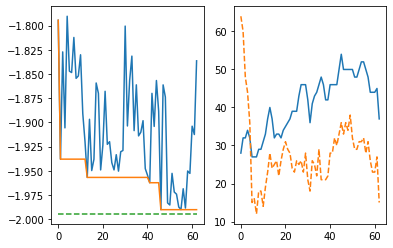

In [5]:
ax1, ax2 = [plt.subplot2grid((1,2),(0,k)) for k in range(2)]
ax1.plot(itsen, label="energy of current circuit")
ax1.plot(itslen, label="lowest found")
ax1.plot(np.ones(len(itslen))*vqe_handler.lower_bound_energy,'--', label="FCI")

ax2.plot(ncnots)
ax2.plot(nparams,'--')

Let's try now to add gates to the circuit, so it converges :) 

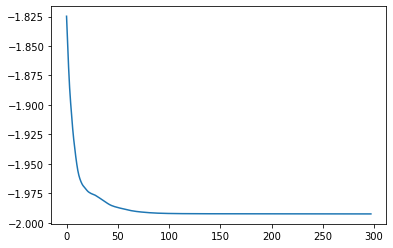

In [62]:
energy, symbol_to_value, training_evolution = vqe_handler.vqe(pindexed_circuit, symbols_to_values=presolver) #compute energy
plt.plot(training_evolution.history["energy"])

In [94]:
def gate_counter_on_qubits(self, indexed_circuit):
    ngates = {k:[0,0] for k in range(len(self.qubits))}
    for ind in indexed_circuit:
        if ind < self.number_of_cnots:
            control, target = self.indexed_cnots[str(ind)]
            ngates[control][1]+=1
            ngates[target][1]+=1   
        else:
            qind = (ind-self.number_of_cnots)%self.n_qubits
            ngates[qind][0]+=1
    return ngates

In [93]:
gate_counter(vqe_handler, indexed_circuit)

{0: [3, 7],
 1: [2, 4],
 2: [1, 6],
 3: [1, 10],
 4: [1, 14],
 5: [2, 12],
 6: [1, 12],
 7: [4, 9]}

In [107]:
def choose_qubit_from_N1q(self, beta=10):
    """
    Note that beta could be annealed as energy decreases.. (at beta = 0 we get uniform sampling)
    function that selects qubit according to how many gates are acting on each one in the circuit
    """
    gc=np.array(list(ngates.values()))[:,0] #### gives the gate population for each qubit
    probs=np.exp(beta*(1-gc/np.sum(gc)))/np.sum(np.exp(beta*(1-gc/np.sum(gc))))
    return np.random.choice(range(vqe_handler.n_qubits),1,p=probs)[0]

In [112]:
gc=np.array(list(ngates.values()))[:,1] #### gives the gate population for each qubit
probs=np.exp(beta*(1-gc/np.sum(gc)))/np.sum(np.exp(beta*(1-gc/np.sum(gc))))

In [124]:
np.random.choice(range(vqe_handler.n_qubits),2,p=probs, replace=False)

array([3, 0])

In [55]:
circuit = vqe_handler.give_circuit(indexed_circuit)[0]


TypeError: operation_at() missing 1 required positional argument: 'moment_index'

In [63]:
import cirq

False

In [ ]:
iid.inserter(indexed_circuit,resolver,-1)